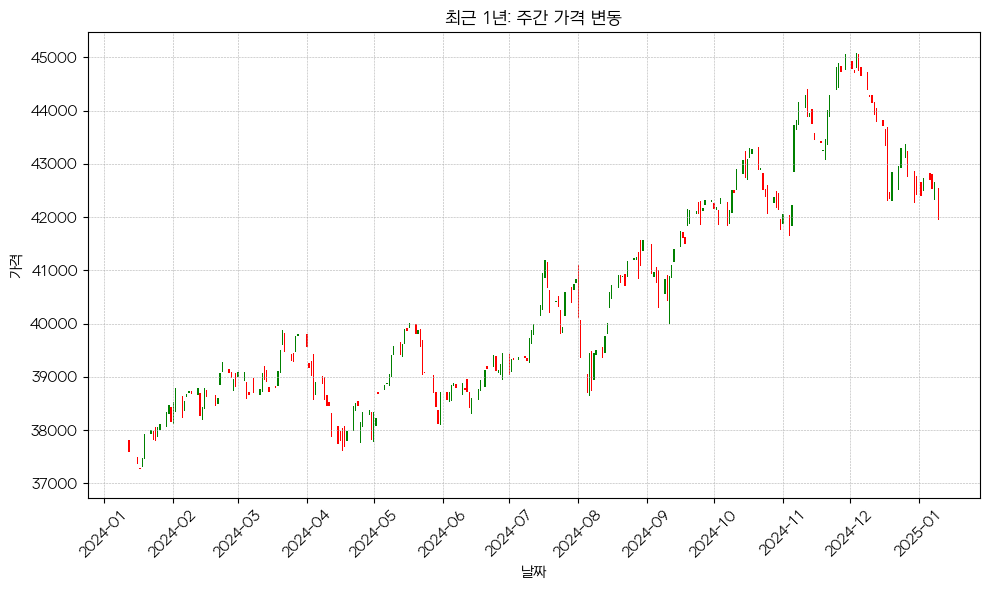

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import date2num
import matplotlib.dates as mdates
import json
from matplotlib.ticker import MaxNLocator

# 한글 폰트 설정 (전역)
plt.rc('font', family='NEXON Lv1 Gothic OTF')
# 마이너스 폰트 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

# JSON 데이터 로드
with open('financial_crawl.json', 'r', encoding='utf-8') as file:
    data = json.load(file)

# 데이터프레임 생성
df = pd.DataFrame(data['다우 산업'])
df.rename(columns={"시가": "Open", "고가": "High", "저가": "Low", "종가": "Close"}, inplace=True)

# 날짜를 datetime 형식으로 변환
df['날짜'] = pd.to_datetime(df['날짜'], format='%Y%m%d')
df['날짜'] = date2num(df['날짜'])

# 캔들차트 그리기
fig, ax = plt.subplots(figsize=(10, 6))  # 플롯 크기 확대 (10 x 6)

# 상승봉 (초록색)
ax.bar(df['날짜'][df['Close'] >= df['Open']], df['Close'][df['Close'] >= df['Open']] - df['Open'][df['Close'] >= df['Open']], 
       bottom=df['Open'][df['Close'] >= df['Open']], color='green', width=0.6)
ax.bar(df['날짜'][df['Close'] >= df['Open']], df['High'][df['Close'] >= df['Open']] - df['Close'][df['Close'] >= df['Open']], 
       bottom=df['Close'][df['Close'] >= df['Open']], color='green', width=0.2)
ax.bar(df['날짜'][df['Close'] >= df['Open']], df['Low'][df['Close'] >= df['Open']] - df['Open'][df['Close'] >= df['Open']], 
       bottom=df['Open'][df['Close'] >= df['Open']], color='green', width=0.2)

# 하락봉 (빨간색)
ax.bar(df['날짜'][df['Close'] < df['Open']], df['Close'][df['Close'] < df['Open']] - df['Open'][df['Close'] < df['Open']], 
       bottom=df['Open'][df['Close'] < df['Open']], color='red', width=0.6)
ax.bar(df['날짜'][df['Close'] < df['Open']], df['High'][df['Close'] < df['Open']] - df['Open'][df['Close'] < df['Open']], 
       bottom=df['Open'][df['Close'] < df['Open']], color='red', width=0.2)
ax.bar(df['날짜'][df['Close'] < df['Open']], df['Low'][df['Close'] < df['Open']] - df['Close'][df['Close'] < df['Open']], 
       bottom=df['Close'][df['Close'] < df['Open']], color='red', width=0.2)

# 날짜 포맷 설정
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # 월 단위 포맷 (YYYY-MM)
ax.xaxis.set_major_locator(mdates.MonthLocator())  # 월 단위 간격 설정

# x축 레이블 설정d
plt.xticks(rotation=45)

# 제목 및 레이블 추가
plt.title('최근 1년: 주간 가격 변동')
plt.xlabel('날짜')
plt.ylabel('가격')

plt.grid(linestyle='--', linewidth=0.4)
plt.tight_layout()
plt.show()


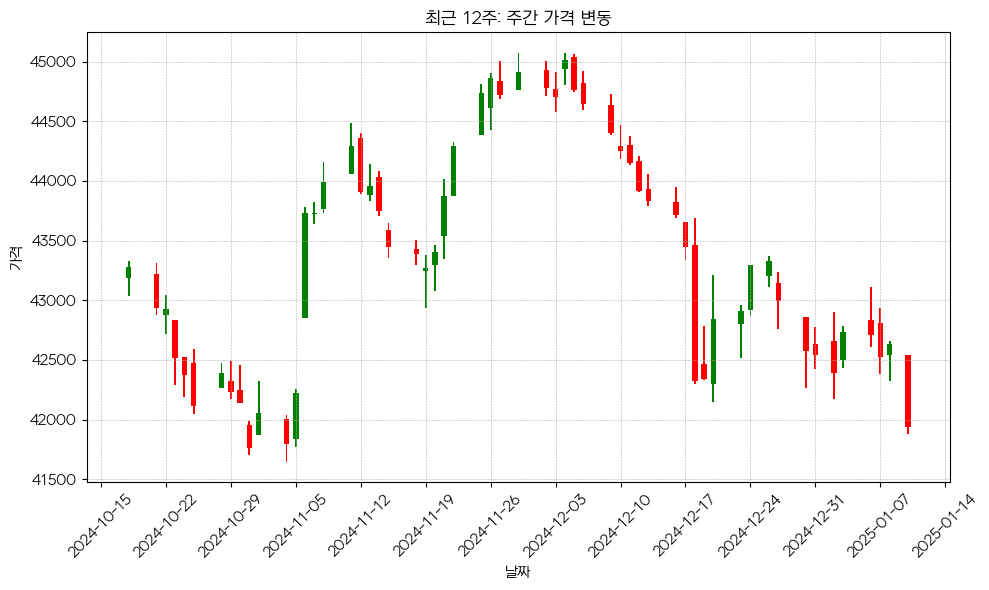

In [11]:
# 데이터프레임 생성
df = pd.DataFrame(data['다우 산업'])
df.rename(columns={"시가": "Open", "고가": "High", "저가": "Low", "종가": "Close"}, inplace=True)

# 날짜를 datetime 형식으로 변환
df['날짜'] = pd.to_datetime(df['날짜'], format='%Y%m%d')

# 가장 최근 날짜를 기준으로 12주간의 데이터 필터링
latest_date = df['날짜'].max()
start_date = latest_date - pd.Timedelta(weeks=12)
df_recent = df[df['날짜'] >= start_date].copy()  # 복사본을 만들어서 변경

# 날짜를 숫자 값으로 변환 (matplotlib에서 사용)
df_recent['날짜'] = date2num(df_recent['날짜'])

# 캔들차트 그리기
fig, ax = plt.subplots(figsize=(10, 6))  # 플롯 크기 확대 (10 x 6)

# 상승봉 (초록색)
ax.bar(df_recent['날짜'][df_recent['Close'] >= df_recent['Open']], df_recent['Close'][df_recent['Close'] >= df_recent['Open']] - df_recent['Open'][df_recent['Close'] >= df_recent['Open']], 
       bottom=df_recent['Open'][df_recent['Close'] >= df_recent['Open']], color='green', width=0.6)
ax.bar(df_recent['날짜'][df_recent['Close'] >= df_recent['Open']], df_recent['High'][df_recent['Close'] >= df_recent['Open']] - df_recent['Close'][df_recent['Close'] >= df_recent['Open']], 
       bottom=df_recent['Close'][df_recent['Close'] >= df_recent['Open']], color='green', width=0.2)
ax.bar(df_recent['날짜'][df_recent['Close'] >= df_recent['Open']], df_recent['Low'][df_recent['Close'] >= df_recent['Open']] - df_recent['Open'][df_recent['Close'] >= df_recent['Open']], 
       bottom=df_recent['Open'][df_recent['Close'] >= df_recent['Open']], color='green', width=0.2)

# 하락봉 (빨간색)
ax.bar(df_recent['날짜'][df_recent['Close'] < df_recent['Open']], df_recent['Close'][df_recent['Close'] < df_recent['Open']] - df_recent['Open'][df_recent['Close'] < df_recent['Open']], 
       bottom=df_recent['Open'][df_recent['Close'] < df_recent['Open']], color='red', width=0.6)
ax.bar(df_recent['날짜'][df_recent['Close'] < df_recent['Open']], df_recent['High'][df_recent['Close'] < df_recent['Open']] - df_recent['Open'][df_recent['Close'] < df_recent['Open']], 
       bottom=df_recent['Open'][df_recent['Close'] < df_recent['Open']], color='red', width=0.2)
ax.bar(df_recent['날짜'][df_recent['Close'] < df_recent['Open']], df_recent['Low'][df_recent['Close'] < df_recent['Open']] - df_recent['Close'][df_recent['Close'] < df_recent['Open']], 
       bottom=df_recent['Close'][df_recent['Close'] < df_recent['Open']], color='red', width=0.2)

# 날짜 포맷 설정
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # 주 단위 포맷 (YYYY-MM-DD)
ax.xaxis.set_major_locator(mdates.WeekdayLocator())  # 주 단위 간격 설정

# x축 레이블 설정
plt.xticks(rotation=45)

# 제목 및 레이블 추가
plt.title('최근 12주: 주간 가격 변동')
plt.xlabel('날짜')
plt.ylabel('가격')

plt.grid(linestyle='--', linewidth=0.4)
plt.tight_layout()
plt.show()



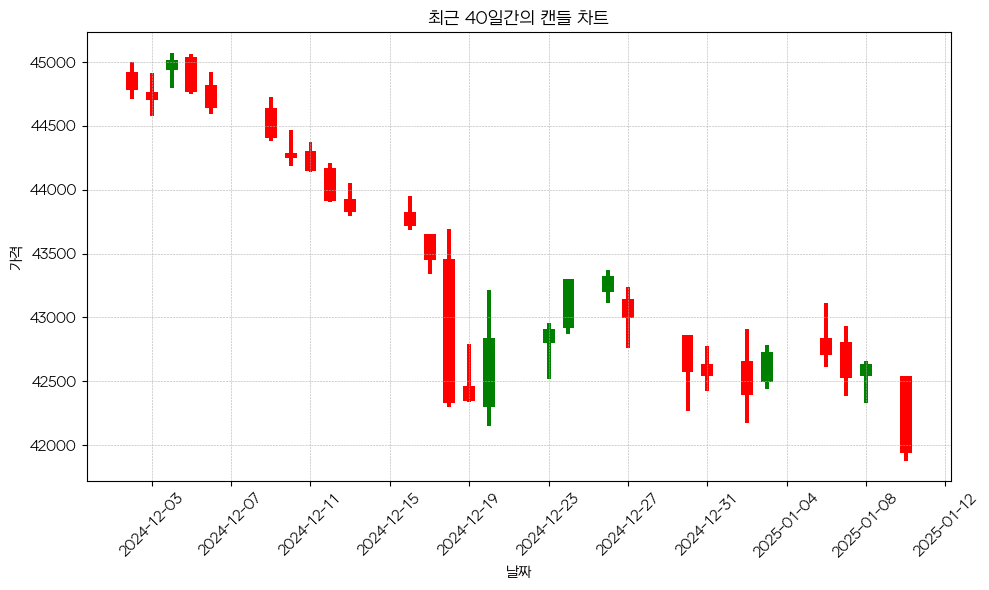

In [40]:
# 데이터프레임 생성
df = pd.DataFrame(data['다우 산업'])

# 열 이름 변경
df.rename(columns={"시가": "Open", "고가": "High", "저가": "Low", "종가": "Close"}, inplace=True)

# 날짜를 datetime 형식으로 변환
df['날짜'] = pd.to_datetime(df['날짜'], format='%Y%m%d')

# 가장 최근 날짜를 기준으로 40일간의 데이터 필터링
latest_date = df['날짜'].max()
start_date = latest_date - pd.Timedelta(days=40)
df_recent = df[df['날짜'] >= start_date].copy()  # 복사본을 만들어서 변경

# 날짜를 숫자 값으로 변환 (matplotlib에서 사용)
df_recent['날짜'] = date2num(df_recent['날짜'])

# 캔들차트 그리기
fig, ax = plt.subplots(figsize=(10, 6))  # 플롯 크기 확대 (10 x 6)

# 상승봉 (초록색)
ax.bar(df_recent['날짜'][df_recent['Close'] >= df_recent['Open']], df_recent['Close'][df_recent['Close'] >= df_recent['Open']] - df_recent['Open'][df_recent['Close'] >= df_recent['Open']], 
       bottom=df_recent['Open'][df_recent['Close'] >= df_recent['Open']], color='green', width=0.6)
ax.bar(df_recent['날짜'][df_recent['Close'] >= df_recent['Open']], df_recent['High'][df_recent['Close'] >= df_recent['Open']] - df_recent['Close'][df_recent['Close'] >= df_recent['Open']], 
       bottom=df_recent['Close'][df_recent['Close'] >= df_recent['Open']], color='green', width=0.2)
ax.bar(df_recent['날짜'][df_recent['Close'] >= df_recent['Open']], df_recent['Low'][df_recent['Close'] >= df_recent['Open']] - df_recent['Open'][df_recent['Close'] >= df_recent['Open']], 
       bottom=df_recent['Open'][df_recent['Close'] >= df_recent['Open']], color='green', width=0.2)

# 하락봉 (빨간색)
ax.bar(df_recent['날짜'][df_recent['Close'] < df_recent['Open']], df_recent['Close'][df_recent['Close'] < df_recent['Open']] - df_recent['Open'][df_recent['Close'] < df_recent['Open']], 
       bottom=df_recent['Open'][df_recent['Close'] < df_recent['Open']], color='red', width=0.6)
ax.bar(df_recent['날짜'][df_recent['Close'] < df_recent['Open']], df_recent['High'][df_recent['Close'] < df_recent['Open']] - df_recent['Open'][df_recent['Close'] < df_recent['Open']], 
       bottom=df_recent['Open'][df_recent['Close'] < df_recent['Open']], color='red', width=0.2)
ax.bar(df_recent['날짜'][df_recent['Close'] < df_recent['Open']], df_recent['Low'][df_recent['Close'] < df_recent['Open']] - df_recent['Close'][df_recent['Close'] < df_recent['Open']], 
       bottom=df_recent['Close'][df_recent['Close'] < df_recent['Open']], color='red', width=0.2)

# 날짜 포맷 설정
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # 일 단위 포맷 (YYYY-MM-DD)

# x축을 12등분
ax.xaxis.set_major_locator(MaxNLocator(nbins=12))  # x축을 12등분으로 설정

# x축 레이블 설정
plt.xticks(rotation=45)

# 제목 및 레이블 추가
plt.title('최근 40일간의 캔들 차트')
plt.xlabel('날짜')
plt.ylabel('가격')

plt.grid(linestyle='--', linewidth=0.4)
plt.tight_layout()
plt.show()



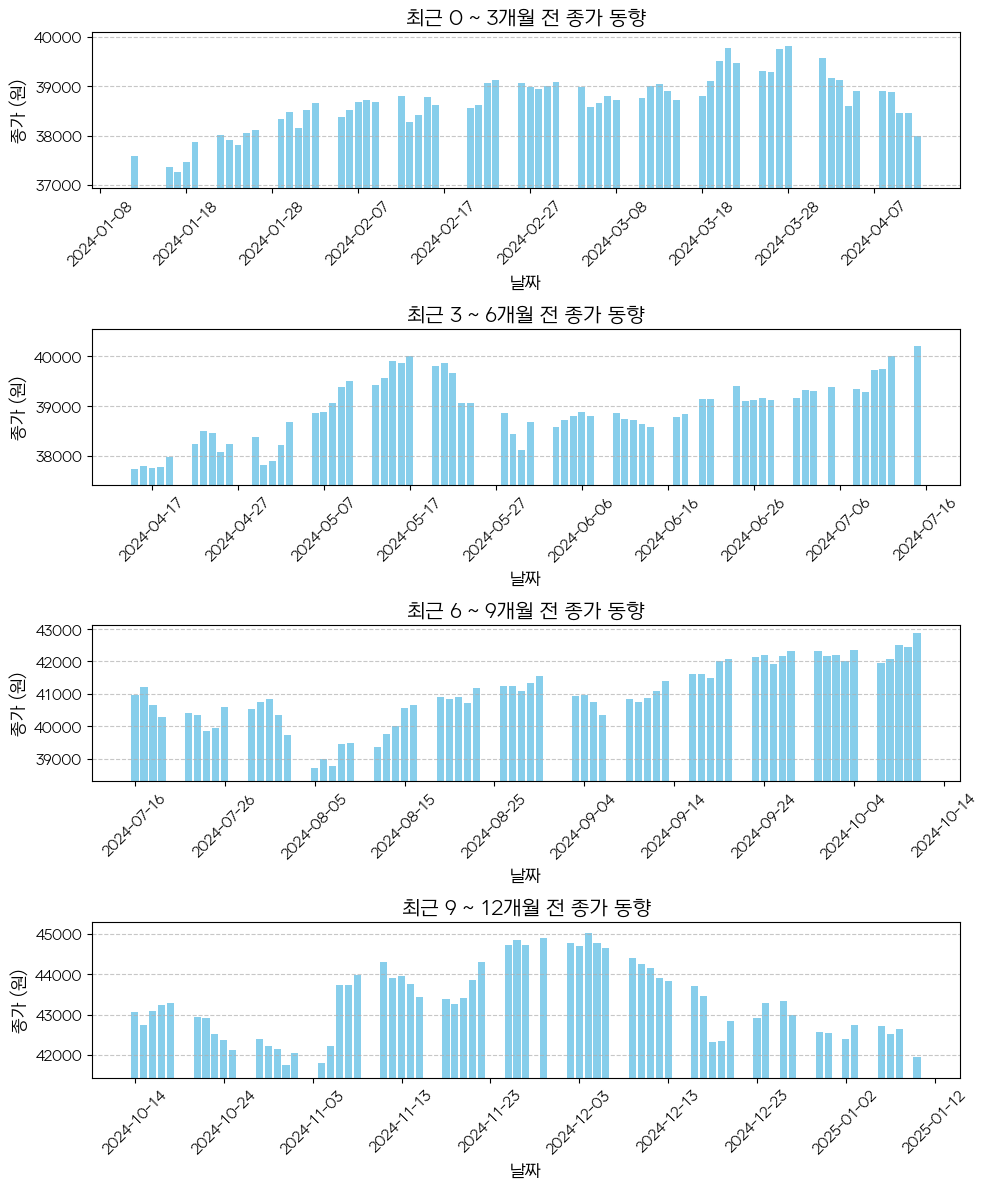

In [46]:
import math
title = {
    0:'0 ~ 3',
    1:'3 ~ 6',
    2:'6 ~ 9',
    3:'9 ~ 12'
}

# DataFrame으로 변환 및 정렬
df = pd.DataFrame(data['다우 산업'])
df['날짜'] = pd.to_datetime(df['날짜'], format='%Y%m%d')
df = df.sort_values(by='날짜')  # 날짜 순으로 정렬

# 데이터를 4등분
num_subplots = 4
chunk_size = math.ceil(len(df) / num_subplots)  # 각 subplot의 데이터 개수
chunks = [df.iloc[i:i + chunk_size] for i in range(0, len(df), chunk_size)]

# Subplot 생성
fig, axes = plt.subplots(num_subplots, 1, figsize=(10, 12))

for i, chunk in enumerate(chunks):
    ax = axes[i]
    ax.bar(chunk['날짜'], chunk['종가'], color='skyblue', label=f'범위 {i+1}')
    
    # 각 subplot의 y축 범위를 해당 구간 데이터로 설정
    y_min = chunk['저가'].min() * 0.995  # 여유를 두기 위해 99.5%
    y_max = chunk['고가'].max() * 1.005  # 여유를 두기 위해 100.5%
    ax.set_ylim(y_min, y_max)

    # x축에 최소 12개의 날짜 표시
    ax.xaxis.set_major_locator(MaxNLocator(nbins=12))  # x축의 날짜 개수를 최소 12로 설정
    
    # 제목 및 레이블
    ax.set_title(f"최근 {title[i]}개월 전 종가 동향", fontsize=14)
    ax.set_xlabel("날짜", fontsize=12)
    ax.set_ylabel("종가 (원)", fontsize=12)
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    ax.tick_params(axis='x', rotation=45)

# 레이아웃 조정 및 출력
plt.tight_layout()
plt.show()

In [43]:
# # DataFrame으로 변환
# df = pd.DataFrame(data['다우 산업'])

# # 날짜를 가독성 높은 형식으로 변환
# df['날짜'] = pd.to_datetime(df['날짜'], format='%Y%m%d')

# # 바 차트 생성
# plt.figure(figsize=(10, 6))
# plt.bar(df['날짜'], df['종가'], color='skyblue', label='종가')

# # y축 범위를 "저가"와 "고가" 범위로 설정
# y_min = df['저가'].min() * 0.995  # 약간 여유를 두기 위해 99.5%
# y_max = df['고가'].max() * 1.005  # 약간 여유를 두기 위해 100.5%
# plt.ylim(y_min, y_max)

# # 그래프 꾸미기
# plt.title('날짜별 종가')
# plt.xlabel('날짜')
# plt.ylabel('종가 (원)')
# plt.xticks(rotation=45)
# plt.grid(axis='y', linestyle='--', alpha=0.4)

# # 그래프 출력
# plt.tight_layout()
# plt.show()